In [118]:
import paddle
import paddle.fluid as fluid
import paddle.fluid.layers as layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [119]:
data_file_path = 'C:/Users/Biao/Desktop/PRSA_data_2010.1.1-2014.12.31.csv'
data = pd.read_csv(data_file_path)
# 查看数据大小，类型及是否存在缺失值
# 使用格式：data.info(), 功能：给出样本数据的相关信息概览 ：行数，列数，列索引，列非空值个数，列类型，内存占用
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [120]:
data

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


从上面的信息中可知pm2.5项目存在缺失值（non-null数量为41757少于其他项目43824），查看缺失数据

In [121]:
# 用来检测缺失值的，布尔值或布尔值array-like
data['pm2.5'].isna()

0         True
1         True
2         True
3         True
4         True
         ...  
43819    False
43820    False
43821    False
43822    False
43823    False
Name: pm2.5, Length: 43824, dtype: bool

In [122]:
data[data['pm2.5'].isna()]

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43548,43549,2014,12,20,12,NaN,-18,0.0,1030.0,NW,244.97,0,0
43549,43550,2014,12,20,13,NaN,-19,1.0,1029.0,NW,249.89,0,0
43550,43551,2014,12,20,14,NaN,-20,1.0,1029.0,NW,257.04,0,0
43551,43552,2014,12,20,15,NaN,-20,2.0,1028.0,NW,262.85,0,0


对缺失数据进行填充
我们采用'ffill'的填充方法,由于0-24行之间为nan且0-24行前面无数据，无法实现填充，因此去除这段数据
查看数据，获得完整无缺失值的数据

In [123]:
# 。iloc, 基于行索引和列索引（index，columns） 都是从 0 开始，.loc先行后列，中间用逗号（,）分割
data = data.iloc[24:].copy()
data

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [124]:
# ffill表示用前面行/列的值，填充当前行/列的空值
# https://blog.csdn.net/qq_17753903/article/details/89892631
data.fillna(method='ffill', inplace=True)
data

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 24 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43800 non-null  int64  
 1   year    43800 non-null  int64  
 2   month   43800 non-null  int64  
 3   day     43800 non-null  int64  
 4   hour    43800 non-null  int64  
 5   pm2.5   43800 non-null  float64
 6   DEWP    43800 non-null  int64  
 7   TEMP    43800 non-null  float64
 8   PRES    43800 non-null  float64
 9   cbwd    43800 non-null  object 
 10  Iws     43800 non-null  float64
 11  Is      43800 non-null  int64  
 12  Ir      43800 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


去除索引值，将索引值替换为时间，查看数据

In [126]:
# 凡是会对原数组作出修改并返回一个新数组的，往往都有一个 inplace可选参数。如果手动设定为True（默认为False），那么原数组直接就被替换。也就是说，采用inplace=True之后，原数组名对应的内存值直接改变；
# 而采用inplace=False之后，原数组名对应的内存值并不改变，需要将新的结果赋给一个新的数组或者覆盖原数组的内存位置
# axis=1表示按列删除
data.drop('No', axis=1, inplace=True)
data

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [127]:
import datetime
# apply(func [, args [, kwargs ]]) 函数用于当函数参数已经存在于一个元组或字典中时，间接地调用函数。args是一个包含将要提供给函数的按位置传递的参数的元组。如果省略了args，任何参数都不会被传递，kwargs是一个包含关键字参数的字典
data['time'] = data.apply(lambda x: datetime.datetime(year=x['year'],month=x['month'],day=x['day'],hour=x['hour']),axis=1)
data

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,time
24,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00
25,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00
26,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00
27,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00
28,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0,2014-12-31 19:00:00
43820,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0,2014-12-31 20:00:00
43821,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0,2014-12-31 21:00:00
43822,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0,2014-12-31 22:00:00


In [128]:
# 通过set_index方法，使用现有列设置单索引和复合索引
data.set_index('time', inplace=True)
data.drop(columns=['year', 'month', 'day', 'hour'], inplace=True) # 以time为列索引
data

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
time,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


为了方便理解数据含义，替换表头

In [129]:
data.columns = ['pm2.5', 'dew', 'temp', 'press', 'cbwd', 'iws', 'snow', 'rain']
data

,pm2.5,dew,temp,press,cbwd,iws,snow,rain
time,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


查看cbwd项目下的数据，其数据只有四种不同的值，对整体的预测任务影响不大，去除该项目

In [130]:
data.cbwd.unique()

array(['SE', 'cv', 'NW', 'NE'], dtype=object)

In [131]:
del data['cbwd']
data

,pm2.5,dew,temp,press,iws,snow,rain
time,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0
...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,242.70,0,0


绘图查看数据

<AxesSubplot:xlabel='time'>

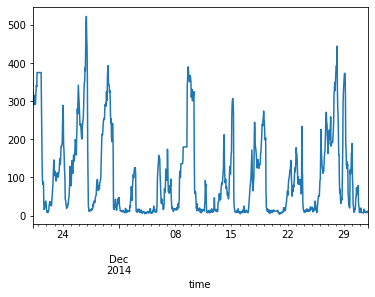

In [132]:
data['pm2.5'][-1000:].plot()

<AxesSubplot:xlabel='time'>

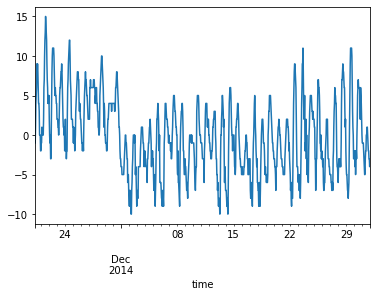

In [133]:
data['temp'][-1000:].plot()

数据标准化，要注意数据标准化应该在训练数据集上，以训练数据的均值和方差作为整个数据的均值和方差
思考：为什么label不需要标准化呢？ 从标准化的目的的角度来看，标准化是为了使得不同特征的数据规范到一个统一的范围，有利于神经网络的反向传播（假如不进行规范化，神经网络可能会刻意捕捉不同批次数据的变化，而忽视了预测任务本身），label也可以做标准化，但是预测时还得反向推导出需要的结果。

建立时间滑窗，使用前5天（每天24小时）来预测后一天（24小时中某个时间点的数据，这里预测第24时）
通俗来说就是，1至144组为一批，2至145组为一批，3至146组为一批，再把每一批拼接在一起，共拼接了43656批

In [134]:
sequence_length = 5*24
delay = 24
# Generated training sequences for use in the model.
def create_sequences(values, time_steps=sequence_length+delay):
    output = []
    for i in range(len(values) - time_steps):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)

data_ = create_sequences(data.values)
print("Training input shape: ", data_.shape)

Training input shape:  (43656, 144, 7)


In [135]:
data_

array([[[129.  , -16.  ,  -4.  , ...,   1.79,   0.  ,   0.  ],
        [148.  , -15.  ,  -4.  , ...,   2.68,   0.  ,   0.  ],
        [159.  , -11.  ,  -5.  , ...,   3.57,   0.  ,   0.  ],
        ...,
        [159.  , -19.  , -14.  , ...,   0.45,   0.  ,   0.  ],
        [198.  , -21.  , -14.  , ...,   1.34,   0.  ,   0.  ],
        [190.  , -21.  , -16.  , ...,   2.23,   0.  ,   0.  ]],

       [[148.  , -15.  ,  -4.  , ...,   2.68,   0.  ,   0.  ],
        [159.  , -11.  ,  -5.  , ...,   3.57,   0.  ,   0.  ],
        [181.  ,  -7.  ,  -5.  , ...,   5.36,   1.  ,   0.  ],
        ...,
        [198.  , -21.  , -14.  , ...,   1.34,   0.  ,   0.  ],
        [190.  , -21.  , -16.  , ...,   2.23,   0.  ,   0.  ],
        [210.  , -21.  , -17.  , ...,   1.79,   0.  ,   0.  ]],

       [[159.  , -11.  ,  -5.  , ...,   3.57,   0.  ,   0.  ],
        [181.  ,  -7.  ,  -5.  , ...,   5.36,   1.  ,   0.  ],
        [138.  ,  -7.  ,  -5.  , ...,   6.25,   2.  ,   0.  ],
        ...,
        [190

In [136]:
data_[0]

array([[129.  , -16.  ,  -4.  , ...,   1.79,   0.  ,   0.  ],
       [148.  , -15.  ,  -4.  , ...,   2.68,   0.  ,   0.  ],
       [159.  , -11.  ,  -5.  , ...,   3.57,   0.  ,   0.  ],
       ...,
       [159.  , -19.  , -14.  , ...,   0.45,   0.  ,   0.  ],
       [198.  , -21.  , -14.  , ...,   1.34,   0.  ,   0.  ],
       [190.  , -21.  , -16.  , ...,   2.23,   0.  ,   0.  ]])

In [137]:
data_[1].shape

(144, 7)

划分数据集，80%为训练集，20%为测试集，查看数据集形状,使用前120个小时的数据预测接下来24个小时中某个时刻的pm2.5的值

In [138]:
# 对数据集进行标准化
split_boundary = int(data_.shape[0] * 0.8)

train = data_[: split_boundary]
test = data_[split_boundary:]

mean = train.mean(axis=0)
std = train.std(axis=0)
train = (train - mean)/std
test = (test - mean)/std

train.shape,test.shape

((34924, 144, 7), (8732, 144, 7))

In [152]:
# 数据生成器
def switch_reader(is_val: bool = False):
    def reader():
        # 判断是否是验证集
        if is_val:
            # 抽取数据使用迭代器返回
            for te in test:
                yield te[:sequence_length],te[-1:][:,0]
        else:
            # 抽取数据使用迭代器返回
            for tr in train:
                yield tr[:sequence_length],tr[-1:][:,0] # 只取第0列pm2.5的值为label
        
    return reader   # 注意！此处不需要带括号

# 划分batch
batch_size = 128
train_reader = fluid.io.batch(reader=switch_reader(), batch_size=batch_size)
val_reader = fluid.io.batch(reader=switch_reader(is_val=True), batch_size=batch_size)
for data in train_reader():
    # print(data[0].shape,data[1].shape)
    train_x = np.array([x[0] for x in data],np.float32)
    train_y = np.array([x[1] for x in data]).astype('int64')
    print(train_y)
    print(train_x.shape,train_y.shape)

[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
(128, 120, 7) (128, 1)
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
(128, 120, 7) (128, 1)
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [3]
 [3]
 [3]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [2]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [3]
 [3]
 [3]
 [2]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
(128, 120, 7) (128, 1)
[[ 0]
 [ 0]
 [ 0]
 [ 1]
 [ 1]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 2]
 [ 1]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 1]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]


In [140]:
train_x[0]

array([[ 3.5274735e-01, -1.2349215e+00, -9.9027044e-01,  1.3097428e+00,
        -4.1670719e-01, -7.4400440e-02, -1.4110252e-01],
       [ 2.2069970e-01, -1.0965220e+00, -1.1527543e+00,  1.4058689e+00,
        -3.9914834e-01, -7.4400440e-02, -1.4110252e-01],
       [ 2.3890467e+00, -1.0273080e+00, -1.2339936e+00,  1.4057841e+00,
        -3.8160855e-01, -7.4400440e-02, -1.4110252e-01],
       [ 2.4110897e+00, -9.5808089e-01, -1.3152394e+00,  1.4057037e+00,
        -4.6929166e-01, -7.4400440e-02, -1.4110252e-01],
       [ 2.4991941e+00, -9.5801902e-01, -1.3964858e+00,  1.4056278e+00,
        -4.6917054e-01, -7.4365072e-02, -1.4110252e-01],
       [ 2.7523599e+00, -9.5796216e-01, -1.4777325e+00,  1.4055520e+00,
        -4.7766346e-01, -7.4297860e-02, -1.4110252e-01],
       [ 2.6202848e+00, -9.5790023e-01, -1.4777600e+00,  1.4054762e+00,
        -4.6870542e-01, -7.4202329e-02, -1.4110252e-01],
       [ 2.5982735e+00, -1.0270061e+00, -1.5590295e+00,  1.4054054e+00,
        -4.6875402e-01, -

In [147]:
train_y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

建立模型DNN
拿到一个任务，首先从简单的模型试起，这里首先选择最简单的两层神经网络，网络可以自己随意添加层数，可以自己尝试调整各种超参数

In [166]:
#定义DNN网络
class MyModel(fluid.dygraph.Layer):
    '''
    DNN网络
    '''
    def __init__(self):
        super(MyModel,self).__init__()
        self.fc1=fluid.dygraph.Linear(5*24*7,32,act='relu')
        self.fc2=fluid.dygraph.Linear(32,1)
        
    def forward(self,input):        # forward 定义执行实际运行时网络的执行逻辑
        '''前向计算'''
        # print('input',input.shape)
        input =fluid.layers.reshape(input,shape=[-1,5*24*7])
        out=self.fc1(input)
        out=self.fc2(out)
        # print(out.shape)
        return out

In [167]:
# 定义绘图函数
Batch=0
Batchs=[]
all_train_loss=[]
def draw_train_loss(Batchs, train_loss,eval_loss):
    title="training-eval loss"
    plt.title(title, fontsize=24)
    plt.xlabel("batch", fontsize=14)
    plt.ylabel("loss", fontsize=14)
    plt.plot(Batchs, train_loss, color='red', label='training loss')
    plt.plot(Batchs, eval_loss, color='g', label='eval loss')
    plt.legend()
    plt.grid()
    plt.show()

epoch:0,batch_id:17,train_loss:[3.0041165],eval_loss:2.0390849709510803
epoch:1,batch_id:17,train_loss:[1.5079911],eval_loss:1.4728583931922912
epoch:2,batch_id:17,train_loss:[1.001555],eval_loss:1.448619818687439
epoch:3,batch_id:17,train_loss:[0.82258904],eval_loss:1.3770277500152588
epoch:4,batch_id:17,train_loss:[0.6690591],eval_loss:1.3405733108520508
epoch:5,batch_id:17,train_loss:[0.5748445],eval_loss:1.3099706828594209
epoch:6,batch_id:17,train_loss:[0.49703223],eval_loss:1.2808472454547881
epoch:7,batch_id:17,train_loss:[0.43699917],eval_loss:1.2570188879966735
epoch:8,batch_id:17,train_loss:[0.38798958],eval_loss:1.2356100976467133
epoch:9,batch_id:17,train_loss:[0.3485557],eval_loss:1.2181243598461151
epoch:10,batch_id:17,train_loss:[0.31529668],eval_loss:1.2030821204185487
epoch:11,batch_id:17,train_loss:[0.28661922],eval_loss:1.1900061011314391
epoch:12,batch_id:17,train_loss:[0.2624056],eval_loss:1.1782374858856202
epoch:13,batch_id:17,train_loss:[0.24206723],eval_loss:1.

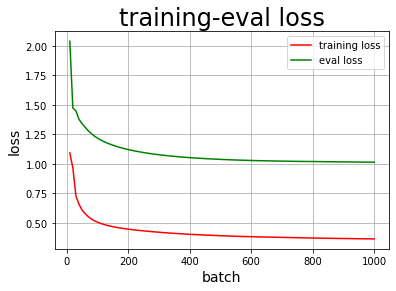

In [168]:
# 启动训练
place = fluid.CPUPlace() 
with fluid.dygraph.guard(place):
    model=MyModel() # 模型实例化
    model.train() # 训练模式
    # opt=fluid.optimizer.SGDOptimizer(learning_rate=train_parameters['learning_strategy']['lr'], parameter_list=model.parameters())#优化器选用SGD随机梯度下降，学习率为0.001.
    opt=fluid.optimizer.AdamOptimizer(learning_rate=0.0001, parameter_list=model.parameters()) 
    epochs_num=100 # 迭代次数
    batch_size = 128*16
    train_reader = fluid.io.batch(reader=switch_reader(), batch_size=batch_size)
    val_reader = fluid.io.batch(reader=switch_reader(is_val=True), batch_size=batch_size)
    Batch=0
    Batchs=[]
    all_train_loss=[]
    all_eval_loss=[]
    for pass_num in range(epochs_num):
        for batch_id, data in enumerate(train_reader()): 
            data_x = np.array([x[0] for x in data],np.float32)
            data_y = np.array([x[1] for x in data]).astype('float32')
            data_x = fluid.dygraph.to_variable(data_x)
            data_y = fluid.dygraph.to_variable(data_y)
        
            # print(data_x.shape, data_y.shape)

            predict = model(data_x)
            # print(predict.shape)
            loss = fluid.layers.mse_loss(predict,data_y)
            avg_loss = fluid.layers.mean(loss) # 获取loss值
            avg_loss.backward()       
            opt.minimize(avg_loss)    # 优化器对象的minimize方法对参数进行更新 
            model.clear_gradients()   # model.clear_gradients()来重置梯度
            if batch_id!=0 and batch_id%10==0:
                Batch = Batch+10 
                Batchs.append(Batch)
                all_train_loss.append(avg_loss.numpy()[0])
                evalavg_loss=[]
                for eval_data in val_reader():
                    eval_data_x = np.array([x[0] for x in eval_data],np.float32)
                    eval_data_y = np.array([x[1] for x in eval_data]).astype('float32')

                    eval_data_x = fluid.dygraph.to_variable(eval_data_x)
                    eval_data_y = fluid.dygraph.to_variable(eval_data_y)

                    eval_predict  =model(eval_data_x)
                    eval_loss = fluid.layers.mse_loss(eval_predict,eval_data_y)
                    eval_loss = fluid.layers.mean(eval_loss)
                    evalavg_loss.append(eval_loss.numpy()[0])#获取loss值
                all_eval_loss.append(sum(evalavg_loss)/len(evalavg_loss))
        print("epoch:{},batch_id:{},train_loss:{},eval_loss:{}".format(pass_num,batch_id,avg_loss.numpy(),sum(evalavg_loss)/len(evalavg_loss)))     

    fluid.save_dygraph(model.state_dict(),'MyModel') # 保存模型
    fluid.save_dygraph(opt.state_dict(),'MyModel') # 保存模型
    print("Final loss: {}".format(avg_loss.numpy()))    
#让我们绘制训练图和验证损失图，以了解训练的进行情况。     
draw_train_loss(Batchs,all_train_loss,all_eval_loss)

使用LSTM进行预测
该OP是长短期记忆网络（LSTM），根据输出序列和给定的初始状态计算返回输出序列和最终状态。在该网络中的每一层对应输入的step，每个step根据当前时刻输入 xt 和上一时刻状态 ht−1,ct−1 计算当前时刻输出 yt 并更新状态 ht,ct 。

In [94]:
#定义LSTM网络
import paddle.fluid as fluid
class MyLSTMModel(fluid.dygraph.Layer):
    '''
    LSTM网络
    '''
    def __init__(self):
        super(MyLSTMModel,self).__init__()
        self.rnn = paddle.nn.LSTM(7, 14, 2)
        self.flatten = paddle.nn.Flatten()
        self.fc1=fluid.dygraph.Linear(120*14,120)
        self.fc2=fluid.dygraph.Linear(120,1)

        
    def forward(self,input):        # forward 定义执行实际运行时网络的执行逻辑
        '''前向计算'''
        # print('input',input.shape)
        out, (h, c)=self.rnn(input)
        out =self.flatten(out)
        out=self.fc1(out)
        out=self.fc2(out)
        return out

In [95]:
Batch=0
Batchs=[]
all_train_loss=[]
def draw_train_loss(Batchs, train_loss,eval_loss):
    title="training-eval loss"
    plt.title(title, fontsize=24)
    plt.xlabel("batch", fontsize=14)
    plt.ylabel("loss", fontsize=14)
    plt.plot(Batchs, train_loss, color='red', label='training loss')
    plt.plot(Batchs, eval_loss, color='g', label='eval loss')
    plt.legend()
    plt.grid()
    plt.show()

epoch:0,batch_id:8,train_loss:[2.8629098],eval_loss:15.335679372151693
epoch:1,batch_id:8,train_loss:[3.6945379],eval_loss:2.8415650526682534
epoch:2,batch_id:8,train_loss:[1.8517003],eval_loss:1.8443225622177124
epoch:3,batch_id:8,train_loss:[1.5205812],eval_loss:1.4524219830830891
epoch:4,batch_id:8,train_loss:[1.1892409],eval_loss:1.1527841289838154
epoch:5,batch_id:8,train_loss:[1.2179931],eval_loss:1.188713550567627
epoch:6,batch_id:8,train_loss:[1.1510723],eval_loss:1.1220674514770508
epoch:7,batch_id:8,train_loss:[1.1405071],eval_loss:1.1119517087936401
epoch:8,batch_id:8,train_loss:[1.1310232],eval_loss:1.091902752717336
epoch:9,batch_id:8,train_loss:[1.1263574],eval_loss:1.0856062769889832
epoch:10,batch_id:8,train_loss:[1.1228912],eval_loss:1.0844302773475647
epoch:11,batch_id:8,train_loss:[1.1202013],eval_loss:1.0846698880195618
epoch:12,batch_id:8,train_loss:[1.1160569],eval_loss:1.0839330752690632
epoch:13,batch_id:8,train_loss:[1.1133246],eval_loss:1.0843896865844727
epoc

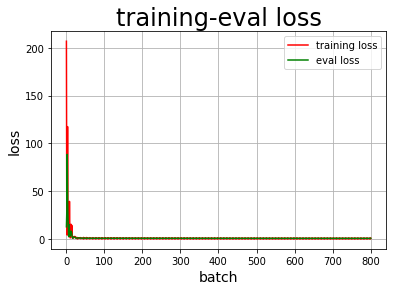

In [96]:
import paddle
place = fluid.CUDAPlace(0) #非develop版本请勿使用GPU版本
with fluid.dygraph.guard(place):
    model=MyLSTMModel() #模型实例化
    # model=MyModel()
    model.train() #训练模式
    # opt=fluid.optimizer.SGDOptimizer(learning_rate=0.001, parameter_list=model.parameters())#优化器选用SGD随机梯度下降，学习率为0.001.
    opt=fluid.optimizer.AdamOptimizer(learning_rate=0.01, parameter_list=model.parameters()) 
    epochs_num=100#迭代次数
    batch_size = 128*32
    train_reader = fluid.io.batch(reader=switch_reader(), batch_size=batch_size)
    val_reader = fluid.io.batch(reader=switch_reader(is_val=True), batch_size=batch_size)
    Batch=0
    Batchs=[]
    all_train_loss=[]
    all_eval_loss=[]
    for pass_num in range(epochs_num):
        for batch_id, data in enumerate(train_reader()): 
            data_x=np.array([x[0] for x in data],np.float32)
            data_y = np.array([x[1] for x in data]).astype('float32')
            data_x = fluid.dygraph.to_variable(data_x)
            data_y = fluid.dygraph.to_variable(data_y)
        
            # print(data_x.shape, data_y.shape)

            predict=model(data_x)
            # print(predict.shape)
            loss=fluid.layers.mse_loss(predict,data_y)
            avg_loss=fluid.layers.mean(loss)#获取loss值
            avg_loss.backward()       
            opt.minimize(avg_loss)    #优化器对象的minimize方法对参数进行更新 
            model.clear_gradients()   #model.clear_gradients()来重置梯度
            if batch_id!=0 and batch_id%1==0:
                Batch = Batch+1 
                Batchs.append(Batch)
                all_train_loss.append(avg_loss.numpy()[0])
                evalavg_loss=[]
                for eval_data in val_reader():
                    eval_data_x = np.array([x[0] for x in eval_data],np.float32)
                    eval_data_y = np.array([x[1] for x in eval_data]).astype('float32')

                    eval_data_x = fluid.dygraph.to_variable(eval_data_x)
                    eval_data_y = fluid.dygraph.to_variable(eval_data_y)

                    eval_predict=model(eval_data_x)
                    eval_loss=fluid.layers.mse_loss(eval_predict,eval_data_y)
                    eval_loss=fluid.layers.mean(eval_loss)
                    evalavg_loss.append(eval_loss.numpy()[0])#获取loss值
                all_eval_loss.append(sum(evalavg_loss)/len(evalavg_loss))
        print("epoch:{},batch_id:{},train_loss:{},eval_loss:{}".format(pass_num,batch_id,avg_loss.numpy(),sum(evalavg_loss)/len(evalavg_loss)))     

    fluid.save_dygraph(model.state_dict(),'MyLSTMModel')#保存模型
    fluid.save_dygraph(opt.state_dict(),'MyLSTMModel')#保存模型
    print("Final loss: {}".format(avg_loss.numpy()))    
#让我们绘制训练图和验证损失图，以了解训练的进行情况。     
draw_train_loss(Batchs,all_train_loss,all_eval_loss)

In [97]:
# 模型预测
# 由于没有划分测试集，在此使用验证集进行测试
import paddle
# place = fluid.CUDAPlace(0) #非develop版本请勿使用GPU版本
place = fluid.CPUPlace()

with fluid.dygraph.guard(place):
    accs = []
    # model_dict, _ = fluid.load_dygraph('MyLSTMModel.pdopt')
    model_dict, _ = fluid.load_dygraph('MyModel.pdopt')
    model = MyModel()
    # model=MyLSTMModel()
    model.load_dict(model_dict) #加载模型参数
    val_reader = fluid.io.batch(reader=switch_reader(is_val=True), batch_size=batch_size)
    res=[]
    for batch_id, eval_data in enumerate(val_reader()):
        eval_data_x = np.array([x[0] for x in eval_data],np.float32)
        eval_data_y = np.array([x[1] for x in eval_data]).astype('float32')

        eval_data_x = fluid.dygraph.to_variable(eval_data_x)
        eval_data_y = fluid.dygraph.to_variable(eval_data_y)

        eval_predict=model(eval_data_x)
        res.append(eval_predict)
res

[Tensor(shape=[4096, 1], dtype=float32, place=CPUPlace, stop_gradient=False,
        [[ 0.05341272],
         [-0.02378896],
         [-0.15127280],
         ...,
         [-0.63094157],
         [-0.65675730],
         [-0.60106558]]),
 Tensor(shape=[4096, 1], dtype=float32, place=CPUPlace, stop_gradient=False,
        [[-0.23549667],
         [-0.27477193],
         [-0.49570006],
         ...,
         [-0.29609662],
         [-0.25900990],
         [-0.53967112]]),
 Tensor(shape=[540, 1], dtype=float32, place=CPUPlace, stop_gradient=False,
        [[-0.62164968],
         [-0.36511594],
         [-0.14427458],
         [-0.06303922],
         [ 0.11935358],
         [ 0.41997689],
         [ 0.45575815],
         [ 0.27753225],
         [ 0.31733370],
         [ 0.35060599],
         [ 0.62668759],
         [ 0.93970209],
         [ 0.90013975],
         [ 0.95694846],
         [ 0.87468183],
         [ 0.87066454],
         [ 0.99136186],
         [ 0.75785673],
         [ 0.65073